In [2]:
import ROOT
import numpy as np
import root_numpy as rnp
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
detfile = "utilities/km3net_jul13_90m.detx"
nuefile = "utilities/km3_v4_nuecc_1.evt.JTE.aa.root"
numufile = "utilities/km3_v4_numucc_1_B.evt.aa.root"

In [4]:
from load_trees import load_trees

In [6]:
ch_id_numu, dom_id_numu, trig_numu, times_numu = load_trees(numufile)
ch_id_nue, dom_id_nue, trig_nue, times_nue = load_trees(nuefile)

In [7]:
from lattice_doms_znewk import lattice_doms

In [8]:
lattice, l_doms = lattice_doms(detfile)

### totally crazy and inefficient way to define the array of lattice indices (but it works XD )

In [9]:
indices = []
for i, (x,y,z) in enumerate(lattice):
    for j,(xd,yd,zd) in enumerate(l_doms):
        if (x,y,z)==(xd,yd,zd):
            #print(i)
            indices.append((i, j))
indices = np.asarray(indices)
doms_map = np.sort(indices, axis=1)[:,0]

In [10]:
i=[]
j=[]
k=[]
for ii,x in enumerate(range(-300,1100,90)):
    for jj,y in enumerate(np.arange(-550,550, 45*np.sqrt(3))):
        for kk,z in enumerate(range(98,712,36)):
            i.append(ii)
            j.append(jj)
            k.append(kk)
        x-= 45
l_i = np.asarray(i)
l_j = np.asarray(j)
l_k = np.asarray(k)

In [11]:
arr = []
for i,j,k in zip(l_i,l_j,l_k):
    arr.append((i,j,k))
lol = np.asarray(arr)

In [12]:
ret = np.zeros((16,15,18))

In [13]:
from timeslices import tslices

In [14]:
tslice = tslices(times_numu, times_nue)

(49997887.0, 49993098.0, 50000747.0, 50004225.0, 49993098.0, 50004225.0)


In [15]:
numu_events = dom_id_numu.shape[0]
n_timeslices = tslice.shape[0] - 1
#X = np.zeros((numu_events,n_timeslices, ret.shape))
X_numu = np.zeros((numu_events,n_timeslices, ret.shape[0],ret.shape[1],ret.shape[2]))
for evt in range(numu_events):
    triggered_dom_ids = (dom_id_numu[evt][trig_numu[evt] == True]) - 1
    times_event_hits = times_numu[evt]
    for ts, tsl in enumerate(zip(tslice[:-1], tslice[1:])):
            low, high = tsl
            hits = np.where((times_event_hits >= low) & (times_event_hits < high))[0]
            if not len(hits):
                continue
            #print(low,high, hits)
            dom_hit_in_slice = triggered_dom_ids[hits]
            l_dom_hit_in_slice = doms_map[dom_hit_in_slice]
            l_ret = lol[l_dom_hit_in_slice]
            for dom_indx in l_ret:
                #print(evt, ts, dom_indx[0],dom_indx[1],dom_indx[2])
                X_numu[evt, ts, dom_indx[0],dom_indx[1],dom_indx[2]] +=1
            #print("dom_hit_in_slice: ",dom_hit_in_slice)
            #print("l_dom_hit_in_slice: ",l_dom_hit_in_slice)
            #print(evt, ts, l_ret)
            #print(l_dom_hit_in_slice)# , dom_hit_in_slice)
            
            #X[evt, ts, l_ret[0],l_ret[1],l_ret[2]] +=1
            #print(X[evt, ts, l_ret])
Y_numu = np.ones(dom_id_numu.shape[0])

In [16]:
X_numu.shape

(1541, 75, 16, 15, 18)

In [16]:
X_numu_sw_12 = np.swapaxes(X_numu, 1,2)
X_numu_sw_23 = np.swapaxes(X_numu_sw_12, 2,3)
X_numu_sw_34 = np.swapaxes(X_numu_sw_23, 3,4)

In [17]:
nue_events = dom_id_nue.shape[0]
n_timeslices = tslice.shape[0] - 1
X_nue = np.zeros((nue_events,n_timeslices, ret.shape[0],ret.shape[1],ret.shape[2]))
for evt in range(nue_events):
    triggered_dom_ids = (dom_id_nue[evt][trig_nue[evt] == True]) - 1
    times_event_hits = times_nue[evt]
    for ts, tsl in enumerate(zip(tslice[:-1], tslice[1:])):
            low, high = tsl
            hits = np.where((times_event_hits >= low) & (times_event_hits < high))[0]
            if not len(hits):
                continue
            #print(low,high, hits)
            dom_hit_in_slice = triggered_dom_ids[hits]
            l_dom_hit_in_slice = doms_map[dom_hit_in_slice]
            l_ret = lol[l_dom_hit_in_slice]
            for dom_indx in l_ret:
                #print(evt, ts, dom_indx[0],dom_indx[1],dom_indx[2])
                X_nue[evt, ts, dom_indx[0],dom_indx[1],dom_indx[2]] +=1
            #print("dom_hit_in_slice: ",dom_hit_in_slice)
            #print("l_dom_hit_in_slice: ",l_dom_hit_in_slice)
            #print(evt, ts, l_ret)
            #print(l_dom_hit_in_slice)# , dom_hit_in_slice)
            
            #X[evt, ts, l_ret[0],l_ret[1],l_ret[2]] +=1
            #print(X[evt, ts, l_ret])
Y_nue = np.zeros(dom_id_nue.shape[0])

In [18]:
X_nue_sw_12 = np.swapaxes(X_nue, 1,2)
X_nue_sw_23 = np.swapaxes(X_nue_sw_12, 2,3)
X_nue_sw_34 = np.swapaxes(X_nue_sw_23, 3,4)

In [19]:
X_numu = X_numu_sw_34
X_nue = X_nue_sw_34

In [18]:
print('X_numu: ', X_numu.shape, 'X_nue: ', X_nue.shape, 'Y_numu: ', Y_numu.shape, 'Y_nue: ', Y_nue.shape)

('X_numu: ', (1541, 75, 16, 15, 18), 'X_nue: ', (1183, 75, 16, 15, 18), 'Y_numu: ', (1541,), 'Y_nue: ', (1183,))


In [19]:
X = np.vstack((X_numu, X_nue))

In [20]:
import keras

Using TensorFlow backend.


In [21]:
keras.backend.image_data_format()

'channels_first'

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [54]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
from keras.layers.convolutional import Conv3D, MaxPooling3D, ZeroPadding3D
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy

### concatenate Y to use data with StratifiedKFold (train-test split), otherwise concatenate later, after converting Y to categorical

In [24]:
Y = np.concatenate((Y_numu, Y_nue))

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [26]:
skf = StratifiedKFold(n_splits=7)
best_validation_acc = 0.0
best_model = None

In [32]:
X_train.shape

(2043, 75, 16, 15, 18)

input_shape for "channels_first" image_data_format

In [40]:
img_channel = X_train.shape[1]
conv_dim_1 = X_train.shape[2]
conv_dim_2 = X_train.shape[3]
conv_dim_3 = X_train.shape[4]
inputshape = (img_channel, conv_dim_1, conv_dim_2, conv_dim_3)

input shape for " image_data_format" = "channels_last

In [37]:
img_channel = X_train.shape[4]
conv_dim_1 = X_train.shape[1]
conv_dim_2 = X_train.shape[2]
conv_dim_3 = X_train.shape[3]
inputshape = (conv_dim_1, conv_dim_2, conv_dim_3, img_channel)

In [62]:
def cnn_model():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', input_shape=inputshape))
    model.add(Conv3D(64, (3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    #model.add(Dropout(0.1))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
def cnn_model2():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', input_shape=inputshape))
    model.add(Conv3D(128, (3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv3D(256, (3, 3, 3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv3D(512, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [51]:
def cnn_model2():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', input_shape=inputshape))
    model.add(Conv3D(128, (3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    #model.add(Dropout(0.1))
    model.add(Conv3D(256, (3, 3, 3), activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Conv3D(512, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [55]:
def cnn_model3():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()

    model.add(ZeroPadding3D((1,1,1), input_shape=inputshape))
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))#, input_shape=inputshape))
    model.add(Conv3D(128, (3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    #model.add(Dropout(0.1))
    model.add(Conv3D(256, (3, 3, 3), activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Conv3D(256, (3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Conv3D(256, (3, 3, 3), activation='relu'))

    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [65]:
def cnn_model_sigmoid():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', input_shape=inputshape))
    model.add(Conv3D(64, (3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    #model.add(Dropout(0.1))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='sigmoid'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [63]:
create_nn_model = cnn_model

In [52]:
create_nn_model = cnn_model2

In [56]:
create_nn_model = cnn_model3

In [66]:
create_nn_model = cnn_model_sigmoid

In [64]:
#cnn first attempt - new dataset + tf with 'channels_first'
best_validation_acc = 0.0
best_model = None
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=64,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=64, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_94 (Conv3D)           (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_95 (Conv3D)           (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_25 (MaxPooling (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_96 (Conv3D)           (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
conv3d_97 (Conv3D)           (None, 32, 2, 1, 3)       27680     
_________________________________________________________________
flatten_23 (Flatten)         (None, 192)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 386       
Total pa

Train on 1751 samples, validate on 292 samples
Epoch 1/20
1751/1751 [==============================] - 24s - loss: 0.6979 - acc: 0.5580 - val_loss: 0.6947 - val_acc: 0.5377
Epoch 2/20
1751/1751 [==============================] - 24s - loss: 0.6326 - acc: 0.6311 - val_loss: 0.7312 - val_acc: 0.5959
Epoch 3/20
1751/1751 [==============================] - 23s - loss: 0.5832 - acc: 0.6745 - val_loss: 0.5908 - val_acc: 0.6541
Epoch 4/20
1751/1751 [==============================] - 24s - loss: 0.5124 - acc: 0.7424 - val_loss: 0.5934 - val_acc: 0.7534
Epoch 5/20
1751/1751 [==============================] - 24s - loss: 0.4490 - acc: 0.8093 - val_loss: 0.5260 - val_acc: 0.8493
Epoch 6/20
1751/1751 [==============================] - 24s - loss: 0.3958 - acc: 0.8447 - val_loss: 0.4862 - val_acc: 0.8390
Epoch 7/20
1751/1751 [==============================] - 24s - loss: 0.3525 - acc: 0.8795 - val_loss: 0.4917 - val_acc: 0.8219
Epoch 8/20
1751/1751 [==============================] - 24s - loss: 0.3

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.legend(['Training', 'Validation'], loc='lower right')

the previous cnn was created putting an increasing number of () in each layer.
(previously, it was decreasing), then dropout was added

In [50]:
#cnn first attempt - new dataset + tf with 'channels_first'
best_validation_acc = 0.0
best_model = None
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=64,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=64, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_33 (Conv3D)           (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_34 (Conv3D)           (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_35 (Conv3D)           (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
conv3d_36 (Conv3D)           (None, 32, 2, 1, 3)       27680     
_________________________________________________________________
flatten_9 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 386       
Total pa

Train on 1751 samples, validate on 292 samples
Epoch 1/20
1751/1751 [==============================] - 25s - loss: 0.6896 - acc: 0.5540 - val_loss: 0.6887 - val_acc: 0.5479
Epoch 2/20
1751/1751 [==============================] - 24s - loss: 0.6323 - acc: 0.6368 - val_loss: 0.6604 - val_acc: 0.6815
Epoch 3/20
1751/1751 [==============================] - 24s - loss: 0.5790 - acc: 0.7264 - val_loss: 0.5325 - val_acc: 0.6815
Epoch 4/20
1751/1751 [==============================] - 24s - loss: 0.4920 - acc: 0.7801 - val_loss: 0.5087 - val_acc: 0.7158
Epoch 5/20
1751/1751 [==============================] - 23s - loss: 0.4222 - acc: 0.8315 - val_loss: 0.4768 - val_acc: 0.7671
Epoch 6/20
1751/1751 [==============================] - 24s - loss: 0.3799 - acc: 0.8412 - val_loss: 0.4223 - val_acc: 0.8356
Epoch 7/20
1751/1751 [==============================] - 24s - loss: 0.3237 - acc: 0.8669 - val_loss: 0.4346 - val_acc: 0.8356
Epoch 8/20
1751/1751 [==============================] - 24s - loss: 0.2

1752/1752 [==============================] - 24s - loss: 0.2914 - acc: 0.8807 - val_loss: 0.5015 - val_acc: 0.8179
Epoch 9/20
1752/1752 [==============================] - 24s - loss: 0.2733 - acc: 0.8836 - val_loss: 0.4931 - val_acc: 0.8076
Epoch 10/20
1752/1752 [==============================] - 24s - loss: 0.2424 - acc: 0.9053 - val_loss: 0.4580 - val_acc: 0.8316
Epoch 11/20
1752/1752 [==============================] - 24s - loss: 0.2148 - acc: 0.9110 - val_loss: 0.5114 - val_acc: 0.8282
Epoch 12/20
1752/1752 [==============================] - 24s - loss: 0.1927 - acc: 0.9229 - val_loss: 0.5429 - val_acc: 0.8316
Epoch 13/20
1752/1752 [==============================] - 24s - loss: 0.1797 - acc: 0.9315 - val_loss: 0.5364 - val_acc: 0.8247
Epoch 14/20
1752/1752 [==============================] - 24s - loss: 0.1686 - acc: 0.9304 - val_loss: 0.5360 - val_acc: 0.8419
Epoch 15/20
1752/1752 [==============================] - 24s - loss: 0.1677 - acc: 0.9372 - val_loss: 0.5787 - val_acc: 0.84

0.86930983847283405

with decreasing ()

In [53]:
#cnn first attempt - new dataset + tf with 'channels_first'
best_validation_acc = 0.0
best_model = None
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=64,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=64, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_61 (Conv3D)           (None, 64, 14, 13, 16)    129664    
_________________________________________________________________
conv3d_62 (Conv3D)           (None, 128, 12, 11, 14)   221312    
_________________________________________________________________
max_pooling3d_16 (MaxPooling (None, 128, 6, 5, 7)      0         
_________________________________________________________________
conv3d_63 (Conv3D)           (None, 256, 4, 3, 5)      884992    
_________________________________________________________________
conv3d_64 (Conv3D)           (None, 512, 2, 1, 3)      3539456   
_________________________________________________________________
flatten_16 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 6146      
Total pa

Train on 1751 samples, validate on 292 samples
Epoch 1/20
1751/1751 [==============================] - 24s - loss: 0.6981 - acc: 0.5448 - val_loss: 0.6837 - val_acc: 0.5788
Epoch 2/20
1751/1751 [==============================] - 24s - loss: 0.6624 - acc: 0.6014 - val_loss: 0.6017 - val_acc: 0.6267
Epoch 3/20
1751/1751 [==============================] - 24s - loss: 0.5848 - acc: 0.6910 - val_loss: 0.5800 - val_acc: 0.6507
Epoch 4/20
1751/1751 [==============================] - 24s - loss: 0.5210 - acc: 0.7584 - val_loss: 0.4781 - val_acc: 0.7055
Epoch 5/20
1751/1751 [==============================] - 24s - loss: 0.3845 - acc: 0.8401 - val_loss: 0.4400 - val_acc: 0.8185
Epoch 6/20
1751/1751 [==============================] - 24s - loss: 0.3140 - acc: 0.8704 - val_loss: 0.3905 - val_acc: 0.8493
Epoch 7/20
1751/1751 [==============================] - 24s - loss: 0.2894 - acc: 0.8761 - val_loss: 0.3742 - val_acc: 0.8767
Epoch 8/20
1751/1751 [==============================] - 24s - loss: 0.2

1752/1752 [==============================] - 24s - loss: 0.2372 - acc: 0.9070 - val_loss: 0.4817 - val_acc: 0.8385
Epoch 9/20
1752/1752 [==============================] - 24s - loss: 0.1975 - acc: 0.9258 - val_loss: 0.5004 - val_acc: 0.8522
Epoch 10/20
1752/1752 [==============================] - 24s - loss: 0.1635 - acc: 0.9326 - val_loss: 0.5430 - val_acc: 0.8625
Epoch 11/20
1752/1752 [==============================] - 24s - loss: 0.1586 - acc: 0.9418 - val_loss: 0.5252 - val_acc: 0.8591
Epoch 12/20
1752/1752 [==============================] - 24s - loss: 0.1481 - acc: 0.9412 - val_loss: 0.5517 - val_acc: 0.8419
Epoch 13/20
1752/1752 [==============================] - 24s - loss: 0.1250 - acc: 0.9532 - val_loss: 0.6801 - val_acc: 0.8076
Epoch 14/20
1752/1752 [==============================] - 24s - loss: 0.1152 - acc: 0.9572 - val_loss: 0.6074 - val_acc: 0.8797
Epoch 15/20
1752/1752 [==============================] - 24s - loss: 0.0934 - acc: 0.9640 - val_loss: 0.6535 - val_acc: 0.87

0.88839941262848754

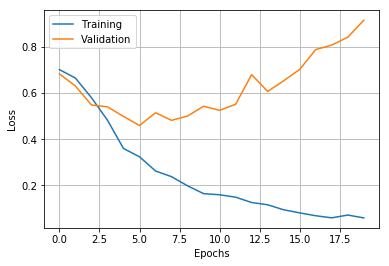

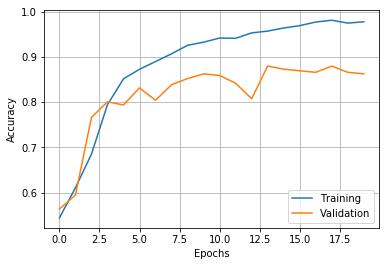

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.legend(['Training', 'Validation'], loc='lower right')

cnn2 - no dropout

In [57]:
#cnn first attempt - new dataset + tf with 'channels_first'
best_validation_acc = 0.0
best_model = None
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=64,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=64, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv3d_93/convolution' (op: 'Conv3D') with input shapes: [?,1,1,2,256], [3,3,3,256,256].

In [69]:
#cnn_sigmoid in the last layer
#cnn first attempt - new dataset + tf with 'channels_first'
best_validation_acc = 0.0
best_model = None
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=64,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle = False)
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=64, epochs=20, shuffle=False)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_138 (Conv3D)          (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_139 (Conv3D)          (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_36 (MaxPooling (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_140 (Conv3D)          (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
conv3d_141 (Conv3D)          (None, 32, 2, 1, 3)       27680     
_________________________________________________________________
flatten_34 (Flatten)         (None, 192)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 386       
Total pa

Train on 1751 samples, validate on 292 samples
Epoch 1/20
1751/1751 [==============================] - 24s - loss: 0.6850 - acc: 0.5717 - val_loss: 0.6906 - val_acc: 0.5719
Epoch 2/20
1751/1751 [==============================] - 24s - loss: 0.6522 - acc: 0.6265 - val_loss: 0.6033 - val_acc: 0.6062
Epoch 3/20
1751/1751 [==============================] - 24s - loss: 0.5805 - acc: 0.6933 - val_loss: 0.5601 - val_acc: 0.7774
Epoch 4/20
1751/1751 [==============================] - 24s - loss: 0.4908 - acc: 0.8115 - val_loss: 0.4655 - val_acc: 0.8185
Epoch 5/20
1751/1751 [==============================] - 24s - loss: 0.4176 - acc: 0.8270 - val_loss: 0.4229 - val_acc: 0.8151
Epoch 6/20
1751/1751 [==============================] - 24s - loss: 0.3695 - acc: 0.8509 - val_loss: 0.3843 - val_acc: 0.8151
Epoch 7/20
1751/1751 [==============================] - 24s - loss: 0.3390 - acc: 0.8595 - val_loss: 0.3884 - val_acc: 0.8356
Epoch 8/20
1751/1751 [==============================] - 24s - loss: 0.3

1752/1752 [==============================] - 24s - loss: 0.4961 - acc: 0.7934 - val_loss: 0.5869 - val_acc: 0.6460
Epoch 5/20
1752/1752 [==============================] - 24s - loss: 0.4392 - acc: 0.8253 - val_loss: 0.3853 - val_acc: 0.8247
Epoch 6/20
1752/1752 [==============================] - 24s - loss: 0.3594 - acc: 0.8373 - val_loss: 0.3464 - val_acc: 0.8419
Epoch 7/20
1752/1752 [==============================] - 24s - loss: 0.3286 - acc: 0.8596 - val_loss: 0.3276 - val_acc: 0.8522
Epoch 8/20
1752/1752 [==============================] - 24s - loss: 0.2979 - acc: 0.8750 - val_loss: 0.3244 - val_acc: 0.8591
Epoch 9/20
1752/1752 [==============================] - 24s - loss: 0.2779 - acc: 0.8847 - val_loss: 0.3409 - val_acc: 0.8316
Epoch 10/20
1752/1752 [==============================] - 24s - loss: 0.2548 - acc: 0.8973 - val_loss: 0.3018 - val_acc: 0.8797
Epoch 11/20
1752/1752 [==============================] - 24s - loss: 0.2356 - acc: 0.9007 - val_loss: 0.3000 - val_acc: 0.8866
E

1752/1752 [==============================] - 24s - loss: 0.3081 - acc: 0.8704 - val_loss: 0.4397 - val_acc: 0.8488
Epoch 8/20
1752/1752 [==============================] - 24s - loss: 0.2809 - acc: 0.8876 - val_loss: 0.4808 - val_acc: 0.8282
Epoch 9/20
1752/1752 [==============================] - 24s - loss: 0.2632 - acc: 0.8921 - val_loss: 0.4108 - val_acc: 0.8591
Epoch 10/20
1752/1752 [==============================] - 24s - loss: 0.2255 - acc: 0.9070 - val_loss: 0.4383 - val_acc: 0.8694
Epoch 11/20
1752/1752 [==============================] - 24s - loss: 0.2172 - acc: 0.9144 - val_loss: 0.4272 - val_acc: 0.8419
Epoch 12/20
1752/1752 [==============================] - 24s - loss: 0.2017 - acc: 0.9201 - val_loss: 0.5559 - val_acc: 0.8110
Epoch 13/20
1752/1752 [==============================] - 24s - loss: 0.1830 - acc: 0.9252 - val_loss: 0.4452 - val_acc: 0.8694
Epoch 14/20
1752/1752 [==============================] - 24s - loss: 0.1679 - acc: 0.9366 - val_loss: 0.4094 - val_acc: 0.872

0.90014684287812041

In [71]:
best_history = best_model.fit(Xtrain, Ytrain, batch_size=64, epochs=30, shuffle=False)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

Epoch 1/30
1752/1752 [==============================] - 20s - loss: 0.0271 - acc: 0.9937    
Epoch 2/30
1752/1752 [==============================] - 21s - loss: 0.0258 - acc: 0.9943    
Epoch 3/30
1752/1752 [==============================] - 22s - loss: 0.0245 - acc: 0.9954    
Epoch 4/30
1752/1752 [==============================] - 23s - loss: 0.0234 - acc: 0.9954    
Epoch 5/30
1752/1752 [==============================] - 23s - loss: 0.0226 - acc: 0.9966    
Epoch 6/30
1752/1752 [==============================] - 23s - loss: 0.0340 - acc: 0.9903    
Epoch 7/30
1752/1752 [==============================] - 23s - loss: 0.0346 - acc: 0.9932    
Epoch 8/30
1752/1752 [==============================] - 23s - loss: 0.0206 - acc: 0.9966    
Epoch 9/30
1752/1752 [==============================] - 23s - loss: 0.0192 - acc: 0.9971    
Epoch 10/30
1752/1752 [==============================] - 23s - loss: 0.0186 - acc: 0.9971    
Epoch 11/30
1752/1752 [==============================] - 23s - loss: 

0.88839941262848754

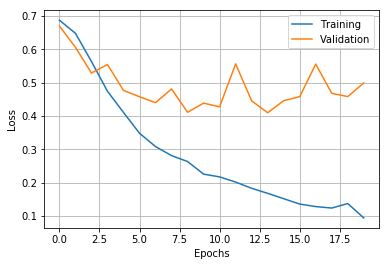

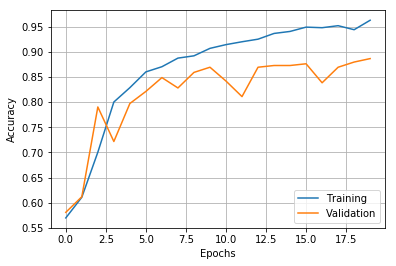

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.legend(['Training', 'Validation'], loc='lower right')

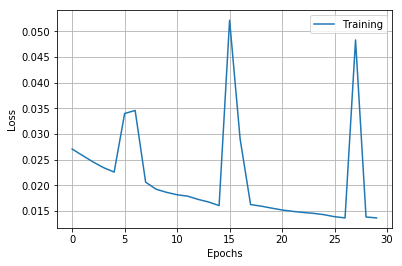

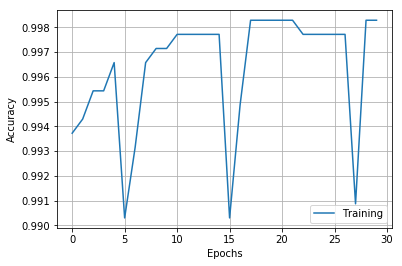

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(best_history.history['loss'])
#plt.plot(best_history.history['val_loss'])
plt.grid()
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(best_history.history['acc'])
#plt.plot(besthistory.history['val_acc'])
plt.grid()
plt.legend(['Training', 'Validation'], loc='lower right')

#### New network, without SKF 

In [26]:
y_numu_categ = np_utils.to_categorical(Y_numu, 2)
y_nue_categ = np_utils.to_categorical(Y_nue, 2)
Y = np.concatenate((y_numu_categ, y_nue_categ))

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

input_shape for "channels_first" image_data_format


In [28]:
img_channel = X_train.shape[1]
conv_dim_1 = X_train.shape[2]
conv_dim_2 = X_train.shape[3]
conv_dim_3 = X_train.shape[4]
inputshape = (img_channel, conv_dim_1, conv_dim_2, conv_dim_3)

input shape for " image_data_format" = "channels_last

In [28]:
img_channel = X_train.shape[4]
conv_dim_1 = X_train.shape[1]
conv_dim_2 = X_train.shape[2]
conv_dim_3 = X_train.shape[3]
inputshape = (conv_dim_1, conv_dim_2, conv_dim_3, img_channel)


check inputshape- shape

In [29]:
inputshape

(75, 16, 15, 18)

In [30]:
X_train.shape

(2043, 75, 16, 15, 18)

In [31]:
X_test.shape

(681, 75, 16, 15, 18)

make sure sample size is a power of 2

In [32]:
X_train = np.vstack((X_train, X_test[:5]))
Y_train = np.vstack((Y_train, Y_test[:5]))
X_test = X_test[5:]
Y_test = Y_test[5:]


In [33]:
X_train.shape

(2048, 75, 16, 15, 18)

In [34]:
X_test.shape

(676, 75, 16, 15, 18)

In [35]:
from keras import backend as K
K.clear_session()

In [68]:
###VGG16

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D, ZeroPadding3D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
def VGG_16(weights_path=None):
    
    
    model = Sequential()
    model.add(ZeroPadding3D((1,1,1),input_shape=inputshape))
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', name="uno"))
    model.add(ZeroPadding3D((1,1,1)))
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu',name="due"))
    model.add(MaxPooling3D((2,2,2), strides=(2,2,2), data_format='channels_first', name="primo_pooling"))

    model.add(ZeroPadding3D((1,1,1)))
    model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', name="tre"))
    model.add(ZeroPadding3D((1,1,1)))
    model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', padding='same',name="quattro"))
    model.add(MaxPooling3D((3,3,3), strides=(2,2,2), data_format='channels_last', name="secondo_pooling"))

    model.add(ZeroPadding3D((1,1,1)))
    model.add(Conv3D(256,kernel_size=(3, 3, 3), activation='relu'))
    model.add(ZeroPadding3D((1,1,1)))
    model.add(Conv3D(256,kernel_size=(3, 3, 3), activation='relu'))
    model.add(ZeroPadding3D((1,1,1)))
    model.add(Conv3D(256,kernel_size=(3, 3, 3), activation='relu'))
    model.add(MaxPooling3D((2,2,2), strides=(2,2, 2), data_format='channels_last'))

    model.add(ZeroPadding3D((1,1,1)))
    model.add(Conv3D(512,kernel_size=(3, 3, 3), activation='relu'))
    model.add(ZeroPadding3D((1,1,1)))
    model.add(Conv3D(512,kernel_size=(3, 3, 3), activation='relu'))
    model.add(ZeroPadding3D((1,1,1)))
    model.add(Conv3D(512,kernel_size=(3, 3, 3), activation='relu'))
    model.add(MaxPooling3D((2,2, 2), strides=(2,2, 2), data_format='channels_last'))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model


# Test pretrained model
model = VGG_16()
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.summary()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding3d_40 (ZeroPaddi (None, 18, 17, 20, 75)    0         
_________________________________________________________________
uno (Conv3D)                 (None, 16, 15, 18, 64)    129664    
_________________________________________________________________
zero_padding3d_41 (ZeroPaddi (None, 18, 17, 20, 64)    0         
_________________________________________________________________
due (Conv3D)                 (None, 16, 15, 18, 64)    110656    
_________________________________________________________________
primo_pooling (MaxPooling3D) (None, 8, 7, 9, 64)       0         
_________________________________________________________________
zero_padding3d_42 (ZeroPaddi (None, 10, 9, 11, 64)     0         
_________________________________________________________________
tre (Conv3D)                 (None, 8, 7, 9, 128)      221312    
__________


    #model.add(ZeroPadding2D((1,1)))
    model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu'))
    #model.add(ZeroPadding2D((1,1)))
    model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu'))
    model.add(MaxPooling3D((2,2,2), strides=(2,2,2), data_format='channels_last'))

    #model.add(ZeroPadding2D((1,1)))
    model.add(Conv3D(256,kernel_size=(3, 3, 3), activation='relu'))
    #model.add(ZeroPadding2D((1,1)))
    model.add(Conv3D(256,kernel_size=(3, 3, 3), activation='relu'))
    #model.add(ZeroPadding2D((1,1)))
    model.add(Conv3D(256,kernel_size=(3, 3, 3), activation='relu'))
    model.add(MaxPooling3D((2,2, 2), strides=(2,2, 2), data_format='channels_last'))
    

    #model.add(ZeroPadding2D((1,1)))
    model.add(Conv3D(512,kernel_size=(3, 3, 3), activation='relu'))
    #model.add(ZeroPadding2D((1,1)))
    model.add(Conv3D(512,kernel_size=(3, 3, 3), activation='relu'))
    #model.add(ZeroPadding2D((1,1)))
    model.add(Conv3D(512,kernel_size=(3, 3, 3), activation='relu'))
    model.add(MaxPooling3D((2,2, 2), strides=(2,2, 2), data_format='channels_last'))

    #model.add(ZeroPadding2D((1,1)))
    model.add(Conv3D(512, kernel_size=(3, 3, 3), activation='relu'))
    #model.add(ZeroPadding2D((1,1)))
    model.add(Conv3D(512, kernel_size=(3, 3, 3), activation='relu'))
    #model.add(ZeroPadding2D((1,1)))
    model.add(Conv3D(512, kernel_size=(3, 3, 3), activation='relu'))
    model.add(MaxPooling3D((2,2,2), strides=(2,2, 2), data_format='channels_last'))


In [69]:
network_history1 = model.fit(X_train, Y_train, batch_size=64, 
                            epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[early_stop])


Train on 2048 samples, validate on 676 samples
Epoch 1/30
2048/2048 [==============================] - 65s - loss: 0.6895 - acc: 0.5620 - val_loss: 0.6838 - val_acc: 0.5621
Epoch 2/30
 256/2048 [==>...........................] - ETA: 53s - loss: 0.6948 - acc: 0.4609

KeyboardInterrupt: 